* you can download the dataset in this link (used only train 
https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [94]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPool2D

## load img dataset (myself)

In [68]:
DATADIR_WITH_MASK = r'C:\Users\k\Desktop\python_fold2\Face Mask img Dataset\WithMask'
DATADIR_WITHOUT_MASK = r'C:\Users\k\Desktop\python_fold2\Face Mask img Dataset\WithoutMask'
IMG_SIZE = 60

data = []
for i,img in enumerate(os.listdir(DATADIR_WITH_MASK)):
    img_array = cv2.imread(os.path.join(DATADIR_WITH_MASK,img ),cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    data.append((img_array, [0]))
    
    if i==2999:
        break


for i, img in enumerate(os.listdir(DATADIR_WITHOUT_MASK)):
    img_array = cv2.imread(os.path.join(DATADIR_WITHOUT_MASK,img),cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    data.append((img_array, [1]))

    if i==2999:
        break




In [69]:
np.array(data).shape

<ipython-input-69-185b8a47b524>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(data).shape


(6000, 2)

In [70]:
import random
random.seed(3)

data_shuffled = random.sample(data, len(data))
data_shuffled[:3]

[(array([[205, 205, 214, ...,  89, 116, 135],
         [203, 203, 216, ...,  92, 128, 141],
         [203, 203, 216, ...,  94, 135, 141],
         ...,
         [198, 213, 218, ..., 180, 180, 180],
         [198, 213, 218, ..., 138, 143, 151],
         [198, 213, 218, ..., 135, 135, 135]], dtype=uint8),
  [0]),
 (array([[30, 35, 24, ..., 35, 43, 33],
         [32, 29, 17, ..., 37, 40, 33],
         [33, 25, 31, ..., 42, 34, 45],
         ...,
         [25, 38, 35, ...,  4,  6,  8],
         [22, 36, 37, ...,  5,  5,  7],
         [21, 27, 45, ...,  7,  8, 12]], dtype=uint8),
  [1]),
 (array([[195, 105,  49, ...,  60,  69,  98],
         [148,  68,  42, ...,  61,  49,  74],
         [ 93,  42,  45, ...,  67,  66,  75],
         ...,
         [ 89, 116,  97, ...,  81,  71,  47],
         [ 77, 124,  95, ...,  72,  50,  59],
         [ 69, 111, 102, ...,  79,  66,  53]], dtype=uint8),
  [1])]

In [71]:
data_shuffled[0]

(array([[205, 205, 214, ...,  89, 116, 135],
        [203, 203, 216, ...,  92, 128, 141],
        [203, 203, 216, ...,  94, 135, 141],
        ...,
        [198, 213, 218, ..., 180, 180, 180],
        [198, 213, 218, ..., 138, 143, 151],
        [198, 213, 218, ..., 135, 135, 135]], dtype=uint8),
 [0])

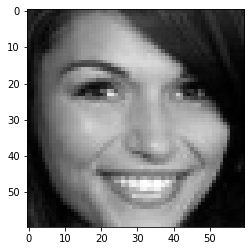

In [151]:
plt.imshow(data_shuffled[1][0],cmap = 'gray')

In [73]:
np.array(data_shuffled[1][0]).shape

(60, 60)

## normalize 

In [119]:
X = []
y = []

for d in data_shuffled:
    X.append(d[0])
    y.append(d[1])

In [120]:
X = np.array(X)/255.0
X.shape

(6000, 60, 60)

In [121]:
X = X.reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(6000, 60, 60, 1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)
np.array(X_train).shape

(4800, 60, 60, 1)

## Build ANN

In [123]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (X_train.shape[1:]), padding = 'SAME', activation = tf.nn.relu))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2), padding= 'SAME'))
model.add(Conv2D(64, kernel_size = (3,3), activation = tf.nn.relu))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2), padding ='SAME'))
model.add(Flatten())
model.add(Dense(1024, activation = tf.nn.relu))
model.add(Dense(1,activation = 'sigmoid'))
model.add(Dropout(0.25))

In [124]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 32)        320       
_________________________________________________________________
average_pooling2d_6 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
average_pooling2d_7 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              12846080  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

## Train

In [125]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])


In [126]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4800, 60, 60, 1), (1200, 60, 60, 1), (4800, 1), (1200, 1))

In [131]:
history = model.fit(X_train, y_train, epochs=5, batch_size = 32, validation_split=0.15)

Epoch 1/5
128/128 [==============================] - 171s 1s/step - loss: 1.9036 - accuracy: 0.8596 - val_loss: 0.2011 - val_accuracy: 0.9264
Epoch 2/5
128/128 [==============================] - 183s 1s/step - loss: 1.8988 - accuracy: 0.8593 - val_loss: 0.1316 - val_accuracy: 0.9556
Epoch 3/5
128/128 [==============================] - 191s 1s/step - loss: 1.9951 - accuracy: 0.8488 - val_loss: 0.1099 - val_accuracy: 0.9722
Epoch 4/5
128/128 [==============================] - 183s 1s/step - loss: 1.9164 - accuracy: 0.8610 - val_loss: 0.3147 - val_accuracy: 0.8847
Epoch 5/5
128/128 [==============================] - 153s 1s/step - loss: 1.8582 - accuracy: 0.8645 - val_loss: 0.0767 - val_accuracy: 0.9833


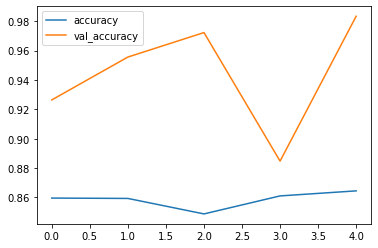

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [168]:
# evaluate

score = model.evaluate(X_test, y_test)
print(f'Test loss:{score[0]*100}% | Test accuracy: {score[1]*100}%')

38/38 [==============================] - 11s 294ms/step - loss: 0.1120 - accuracy: 0.9792
Test loss:11.20152398943901% | Test accuracy: 97.91666865348816%


## Predict new sample

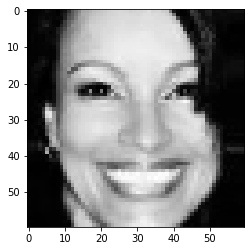

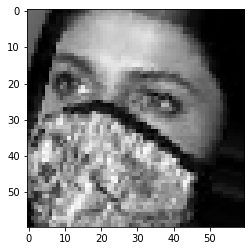

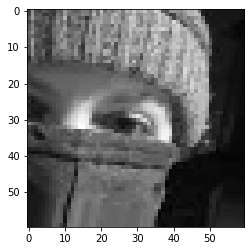

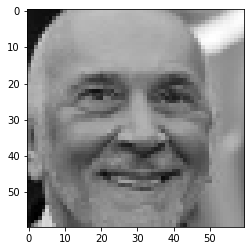

[array([1]), array([0]), array([0]), array([1])]

In [156]:
using_samples = [1,500,3000,150]
my_pred_sample_y_real = []

for sample in using_samples:
    reshaped_img = X_train[sample].reshape(IMG_SIZE, IMG_SIZE)
    my_pred_sample_y_real.append(y_train[sample])                                   # [[1], [0],[0],[1]]   <-- predict should be like this
    
    plt.imshow(reshaped_img, cmap = 'gray')
    plt.show()
their_y

In [146]:
using_samples = [1,500,3000,150]
predicting_imgs = []

[(predicting_imgs.append(X_train[sample])) for sample in using_samples]
    
predicting_imgs

[array([[[0.01176471],
         [0.01176471],
         [0.01568627],
         ...,
         [0.06666667],
         [0.0627451 ],
         [0.0627451 ]],
 
        [[0.01176471],
         [0.01176471],
         [0.01568627],
         ...,
         [0.03529412],
         [0.03529412],
         [0.03529412]],
 
        [[0.01176471],
         [0.01568627],
         [0.01960784],
         ...,
         [0.03529412],
         [0.03137255],
         [0.03529412]],
 
        ...,
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],
 
        [[0.01960784],
         [0.01176471],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.01176471],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]]]),
 array([[[0.40392157],
         [0.39215686],
         

In [147]:
predicting_imgs = np.array(predicting_imgs)
print(predicting_imgs.shape)

(4, 60, 60, 1)


In [148]:
predictions = model.predict(predicting_imgs)
predictions

array([[9.5889193e-01],
       [1.5148059e-05],
       [6.2695146e-04],
       [9.0412921e-01]], dtype=float32)

In [160]:
my_sample_pred_y_res = []
[my_sample_pred_y_res.append(pred.round())  for pred in predictions]
my_sample_pred_y_res

[array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32)]

## Check |Yep|  

In [167]:
print(my_pred_sample_y_real)
print((my_sample_pred_y_res))

[array([1]), array([0]), array([0]), array([1])]
[array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32)]


## All correct!